<DIV ALIGN=CENTER>

# Introduction to Anomaly Detection
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore the concept of anomaly detection, where
one tries to find points or groups of points that do not beling with other points, groups, or clusters of data points. Anomaly detection is often closely tied to clustering, and in fact DBSCAN (REF NB) indicates _noise_ points that are not assigned to any specific cluster.


-----
[db]: https://en.wikipedia.org/wiki/DBSCAN

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


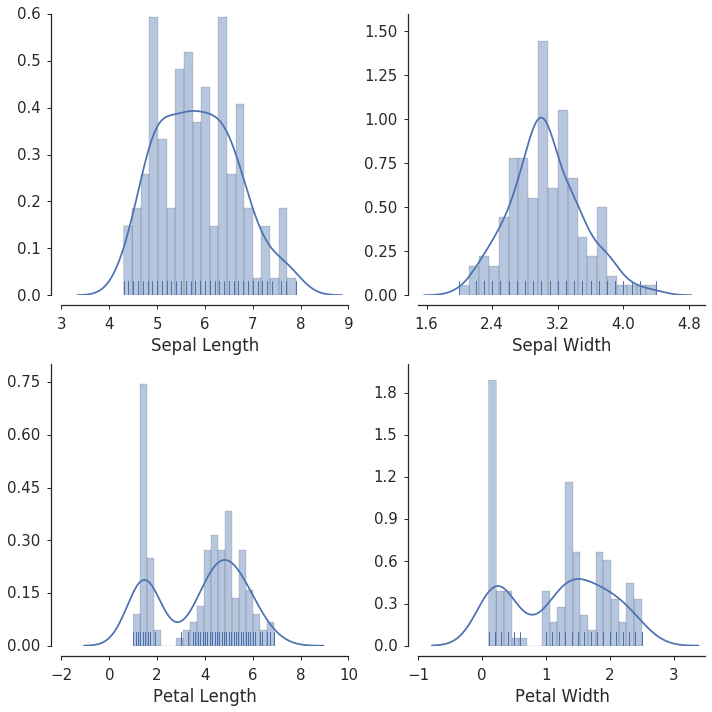

In [2]:
iris = sns.load_dataset('iris')
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

from matplotlib.ticker import MaxNLocator


def plot_oned(data, axs):
    sns.distplot(data, bins=20, kde=True, rug=True, norm_hist=True, ax=axs)
    axs.xaxis.set_major_locator(MaxNLocator(6))
    axs.yaxis.set_major_locator(MaxNLocator(7))
    sns.despine(offset=10)

# Make a box plot to show distributions
sns.set(style='white', font_scale=1.5, 
        rc={'xtick.major.size': 4.0, 'ytick.major.size': 4.0})
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plot_oned(iris['Sepal Length'], axs[0][0])
plot_oned(iris['Sepal Width'], axs[0][1])
plot_oned(iris['Petal Length'], axs[1][0])
plot_oned(iris['Petal Width'], axs[1][1])
plt.tight_layout()

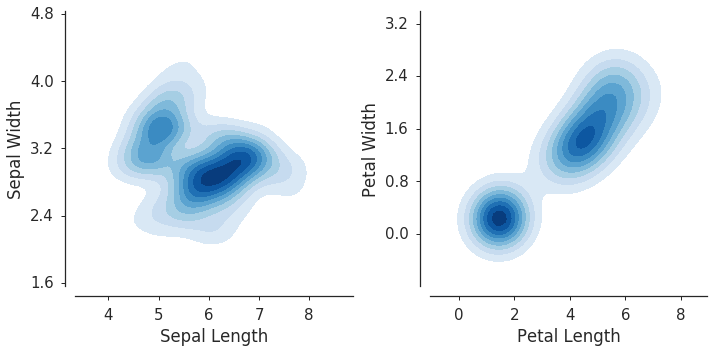

In [3]:
def plot_twod(x, y, axs):
    sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False, ax=axs)
    axs.xaxis.set_major_locator(MaxNLocator(6))
    axs.yaxis.set_major_locator(MaxNLocator(6))
    #axs.set_aspect('equal')
    sns.despine(offset=10)

sns.set(style='white', font_scale=1.5, 
        rc={'xtick.major.size': 4.0, 'ytick.major.size': 4.0})
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_twod(iris['Sepal Length'], iris['Sepal Width'], axs[0])
plot_twod(iris['Petal Length'], iris['Petal Width'], axs[1])
plt.tight_layout()

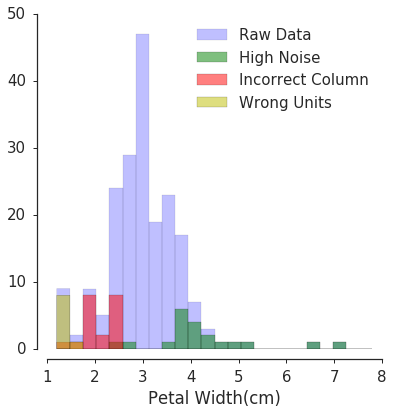

In [4]:
from scipy.stats import uniform

data = iris['Sepal Width']
mu = np.mean(data)
sig = np.std(data)

# Add some extreme outliers
x = np.append(data, (mu - 2.0 * sig) * uniform.rvs(0.9, 1.1, size=10))
x = np.append(x, (mu + 2.0 * sig) * uniform.rvs(0.9, 1.1, size=10))

x = np.append(x, iris['Petal Width'][-20:], axis=0)
x = np.append(x, iris['Sepal Width'][-20:]/2.54, axis=0)

fig, axs = plt.subplots(figsize=(6, 6))

def hist_oned(x, axs):
    bins=np.linspace(1.2, 7.8, 25)
    axs.hist(x, bins=bins, color='b', alpha=0.25, label='Raw Data')
    axs.hist(x[-60:-40], bins=bins, color='g', alpha=0.5, label='High Noise')
    axs.hist(x[-40:-20], bins=bins, color='r', alpha=0.5, label='Incorrect Column')
    axs.hist(x[-20:], bins=bins, color='y', alpha=0.5, label='Wrong Units')

    plt.legend(loc='best')
    axs.set_xlabel('Petal Width(cm)')
    sns.despine(offset=10)
    
hist_oned(x, axs)
plt.show()

In [5]:
from scipy import stats

mu = np.mean(x[:-60]); sig = np.std(x[:-60])

print('Statistics for Original Data:\n', 25*'-')
print('Median = {0:4.3f}'.format(np.median(x[:-60])))
print('Mean = {0:4.3f}'.format(mu))
print('Std Dev = {0:4.3f}'.format(sig))
print('Trimmed Mean ({1:3.2f}) = {0:4.3f}'.format(stats.tmean(x, (mu - sig, mu + sig)), sig))
print('Trimmed Std ({1:3.2f}) = {0:4.3f}'.format(stats.tstd(x, (mu - sig, mu + sig)), sig))

mu = np.mean(x); sig = np.std(x)

print('\nStatistics for Noisy Data:\n', 25*'-')
print('Median = {0:4.3f}'.format(np.median(x)))
print('Mean = {0:4.3f}'.format(mu))
print('Std Dev = {0:4.3f}'.format(sig))
print('Trimmed Mean ({1:3.2f}) = {0:4.3f}'.format(stats.tmean(x, (mu - sig, mu + sig)), sig))
print('Trimmed Std ({1:3.2f}) = {0:4.3f}'.format(stats.tstd(x, (mu - sig, mu + sig)), sig))

Statistics for Original Data:
 -------------------------
Median = 3.000
Mean = 3.057
Std Dev = 0.434
Trimmed Mean (0.43) = 3.035
Trimmed Std (0.43) = 0.211

Statistics for Noisy Data:
 -------------------------
Median = 3.000
Mean = 2.896
Std Dev = 0.885
Trimmed Mean (0.89) = 2.965
Trimmed Std (0.89) = 0.401


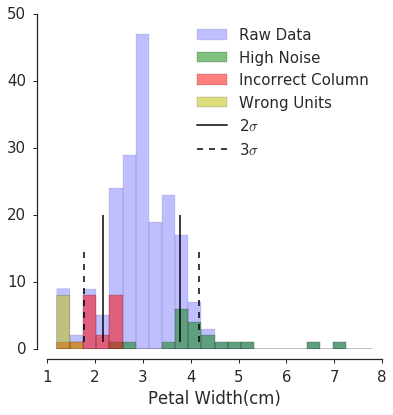

In [6]:
fig, axs = plt.subplots(figsize=(6, 6))

hist_oned(x, axs)

tmu = stats.tmean(x, (mu - sig, mu + sig))
tsig = stats.tstd(x, (mu - sig, mu + sig))

xl = [(tmu - 2.0 * tsig), (tmu + 2.0 * tsig)]
axs.vlines(xl, ymax = 20, ymin = 1, linestyle='-', lw=2, alpha = 0.75, label='2$\sigma$')

xl = [(tmu - 3.0 * tsig), (tmu + 3.0 * tsig)]
axs.vlines(xl, ymax = 15, ymin = 1, linestyle='--', lw=2, alpha = 0.75, label='3$\sigma$')

plt.legend(loc='best')
plt.show()

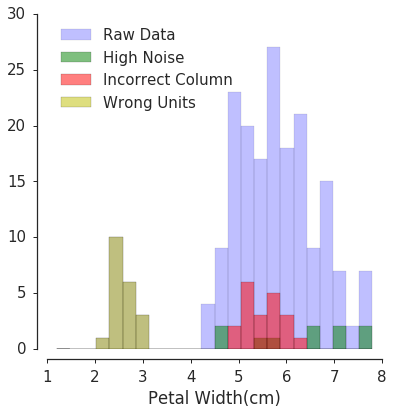

In [7]:
data = iris['Sepal Length']
mu = np.mean(data)
sig = np.std(data)

# Add some extreme outliers
y = np.append(data, (mu - 2.0 * sig) * uniform.rvs(0.9, 1.1, size=10))
y = np.append(y, (mu + 2.0 * sig) * uniform.rvs(0.9, 1.1, size=10))

y = np.append(y, iris['Petal Length'][-20:], axis=0)
y = np.append(y, iris['Sepal Length'][-20:]/2.54, axis=0)

fig, axs = plt.subplots(figsize=(6, 6))

hist_oned(y, axs)
plt.show()

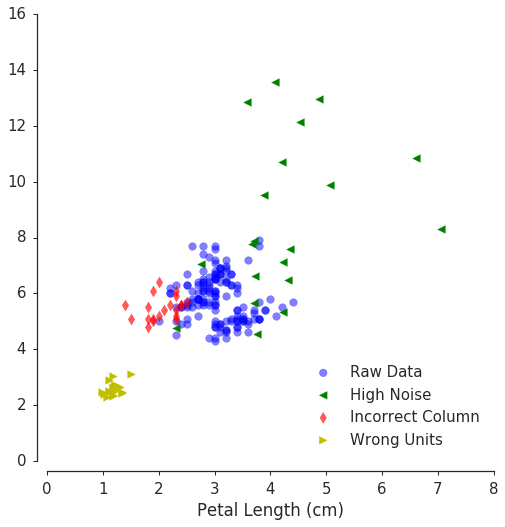

In [8]:
fig, axs = plt.subplots(figsize=(8, 8))
    
plt.scatter(x[:-60], y[:-60], color='b', s=60, alpha=0.5, label='Raw Data')
plt.scatter(x[-60:-40], y[-60:-40], color='g', s=60, marker='<', label='High Noise')
plt.scatter(x[-40:-20], y[-40:-20], color='r', s=60, marker='d', alpha=0.65, label='Incorrect Column')
plt.scatter(x[-20:], y[-20:], color='y', s=60, marker='>', label='Wrong Units')

plt.legend(loc=4)
axs.set_xlabel('Petal Width (cm)')
axs.set_xlabel('Petal Length (cm)')
sns.despine(offset=10)
plt.show()

In [9]:
# We will use DBSCAN from scikit-learn
from sklearn.cluster import DBSCAN

data = np.array((x, y)).T
dbs = DBSCAN(eps=0.25, min_samples=10)
dbs.fit(data)

from collections import Counter

print('DBSCAN Cluster membership:\n', 25*'-')
for key, val in Counter(dbs.labels_).most_common():
    print('Class {0:2d} has {1:3d} members'.format(key, val))

DBSCAN Cluster membership:
 -------------------------
Class  1 has  83 members
Class -1 has  74 members
Class  0 has  35 members
Class  2 has  18 members


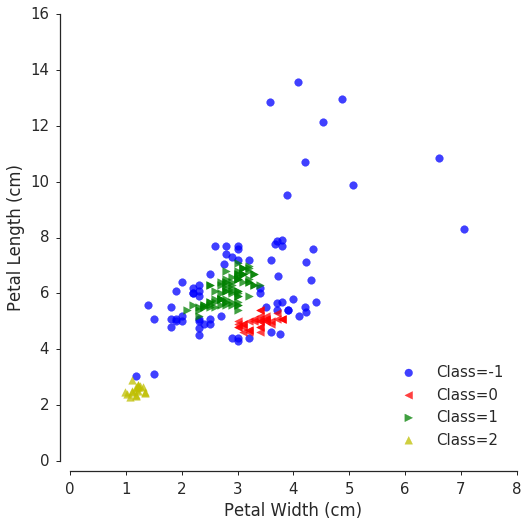

In [10]:
def make_plot(df, axs, lbl, c, m):
    xx = df[df.Label==lbl][['SW']]
    yy = df[df.Label==lbl][['SL']]
    axs.scatter(xx, yy, color=c, marker=m, alpha =0.75, s=60, label='Class={0}'.format(lbl))

df = pd.DataFrame({'SW': x, 'SL': y, 'Label': dbs.labels_})

fig, axs = plt.subplots(figsize=(8, 8))

ca = ['b', 'r', 'g', 'y', 'c']
ma = ['o', '<', '>', '^', 'v']

for idx, lbl in enumerate(np.unique(dbs.labels_)):
    make_plot(df, axs, lbl, ca[idx], ma[idx])

plt.legend(loc=4)
axs.set_xlabel('Petal Width (cm)')
axs.set_ylabel('Petal Length (cm)')
sns.despine(offset=10)
plt.show()

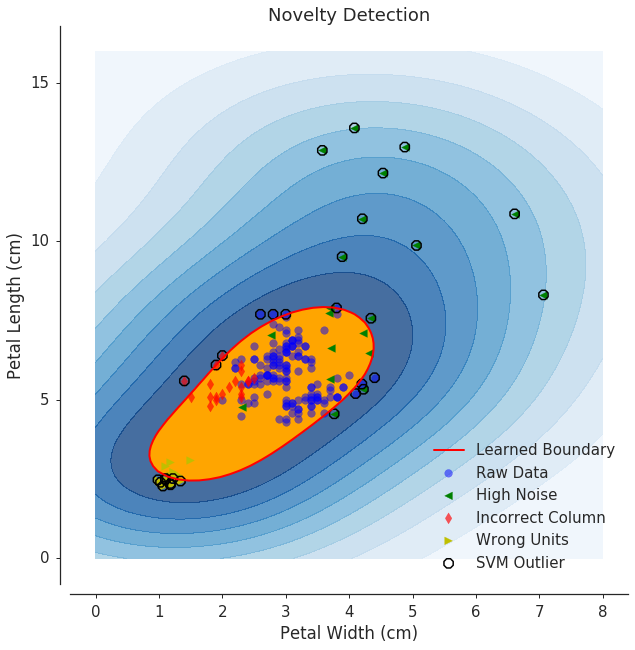

In [11]:
# Modified from scikit learn
# http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html

from sklearn import svm
from sklearn.preprocessing import scale

xx, yy = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 16, 100))

# scikit learn recommended formula
of = 0.1 # Expected Outlier Fraction
nuv = 0.95 * of + 0.05

svc = svm.OneClassSVM(nu=nuv, kernel="rbf", gamma=0.1)
svc.fit(data)
preds = svc.predict(data)

z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig, axs = plt.subplots(figsize=(10, 10))

plt.title("Novelty Detection")
plt.contourf(xx, yy, z, levels=np.linspace(z.min(), 0, 10), cmap=plt.cm.Blues, alpha=0.75)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, z, levels=[0, z.max()], colors='orange')

p1 = plt.scatter(x[:-60], y[:-60], color='b', s=60, alpha=0.5)
p2 = plt.scatter(x[-60:-40], y[-60:-40], color='g', s=60, marker='<')
p3 = plt.scatter(x[-40:-20], y[-40:-20], color='r', s=60, marker='d', alpha=0.65)
p4 = plt.scatter(x[-20:], y[-20:], color='y', s=60, marker='>')

df = pd.DataFrame({'x': x, 'y': y, 'p': preds})
p5 = plt.scatter(df[df.p < 0].x, df[df.p < 0].y, s=100, \
                 marker='8', facecolor='none', edgecolor='black', \
                 linewidth=1.5, linestyle='-')

axs.legend([a.collections[0], p1, p2, p3, p4, p5], \
           ['Learned Boundary', 'Raw Data', 'High Noise', \
            'Incorrect Column', 'Wrong Units', 'SVM Outlier'], loc=4)

axs.set_xlabel('Petal Width (cm)')
axs.set_ylabel('Petal Length (cm)')
sns.despine(offset=10)
plt.show()

-----

## Student Activity

In the preceding cells, we used ... to build a
model representation of the digit data and to subsequently sample from
this model to make new digit images. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the number of PCA components lower and higher. How does this
affect the fidelity of the new digit images?
2. Change the bandwidth used in the KDE estimator. How does this affect
the fidelity of the new digit images?
3. Try using a different kernel function, for example a `exponential` or
`epanechnikov`. How does this affect the fidelity of the new digit images?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----

## Handwritten Digits

Now we switch to a second type of data and explore clustering with the
handwritten digit data set. First we will load the data and review some
of the sample. After which, we will apply PCA to the data and use this
transformed data to compute clusters via the k-means and DBSCAN cluster
algorithms.

-----

Total number of samples = 1797


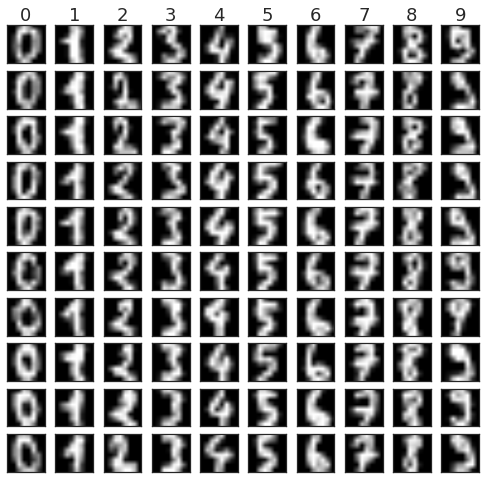

In [12]:
# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

-----

### Clustering of image data

Now that these data are loaded, we first compute a PCA transformation of
the digit data before clustering to both speed up the computation and to
make the results more robust (by minimizing dimensions with little
signal). After clustering the data, we display the confusion matrix for
this data set (since we *know* the correct labels) before displaying a
_typical_ image for each cluster. These visualizations can be used to
better decode the confusion matrix, since the cluster ids will not match
the true cluster ids (which are simply the integer labels). After this,
we determine the best cluster for our _fake_ digit data, before moving
on to the DBSCAN algorithm.

-----

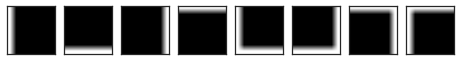

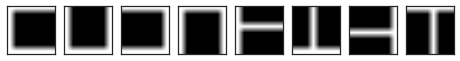

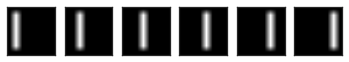

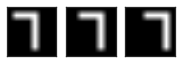

In [13]:
from helper_code import digits as hd

fakes = hd.make_fakes()
hd.plot_numbers(fakes[:8])
hd.plot_numbers(fakes[8:])

ones = hd.make_ones()
hd.plot_numbers(ones)

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [14]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Compute PCA for digit data and transform
pca = PCA(n_components=8, copy=True)
from sklearn.preprocessing import scale

x2 = x.copy()
x2[x2>0] = 16

xx = np.append(x2, fakes, axis=0)
xx = np.append(xx, ones, axis=0)
xx = np.append(xx, sevens, axis=0)

data = pca.fit_transform(scale(xx))
#pca.transform(fakes).shape

print("Explained Variance per PCA component\n", 35*'-')
for idx, val in enumerate(pca.explained_variance_ratio_):
    print('PCA component {0:2d}: {1:4.1f}%'.format(idx, val*100))
    
print(35*'-', '\nTotal Explained Variance (All PCA components: {0:4.1f}%\n'.format(
 sum(pca.explained_variance_ratio_[:]*100)))

print('Variance explained (First two PCA components): {0:4.1f}%\n'.format(
    sum(pca.explained_variance_ratio_[:2]*100)))

print('Variance explained (Last two PCA components): {0:4.1f}%\n'.format(
    sum(pca.explained_variance_ratio_[-2:]*100)))

Explained Variance per PCA component
 -----------------------------------
PCA component  0: 12.7%
PCA component  1:  8.4%
PCA component  2:  7.7%
PCA component  3:  6.7%
PCA component  4:  5.4%
PCA component  5:  4.3%
PCA component  6:  3.8%
PCA component  7:  3.5%
----------------------------------- 
Total Explained Variance (All PCA components: 52.6%

Variance explained (First two PCA components): 21.2%

Variance explained (Last two PCA components):  7.3%



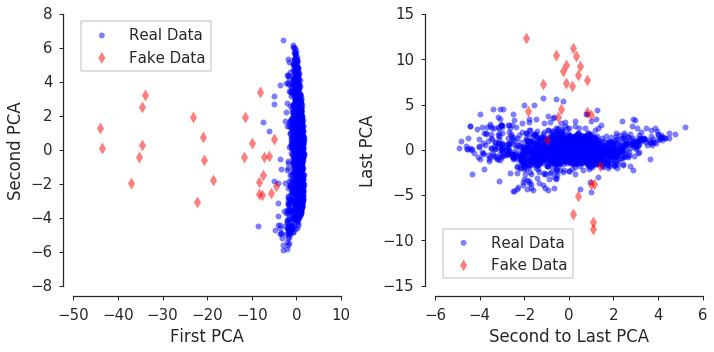

In [15]:
def plot_digit_pca(x, y, idx, ax, llc, xlbl, ylbl):
    
    ax.scatter(x[:-idx], y[:-idx], color='b', marker='o', \
               alpha=0.5, s=30, label='Real Data')
    
    ax.scatter(x[-idx:], y[-idx:], color='r', marker='d', \
               alpha=0.5, s=60, label='Fake Data')

    ax.legend(loc=llc, frameon=True)
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    sns.despine(offset=10)

sns.set(style='white', font_scale=1.5, 
        rc={'xtick.major.size': 4.0, 'ytick.major.size': 4.0})

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_digit_pca(data[:, 0], data[:, 1], 25, axs[0], 2, 'First PCA', 'Second PCA')
plot_digit_pca(data[:, -2], data[:, -1], 25, axs[1], 3, 'Second to Last PCA', 'Last PCA')

plt.tight_layout()

-----

## Student Activity

In the preceding cells, we used ... of the digit data and to subsequently sample from
this model to make new digit images. Now that you have run the Notebook,
go back and make the following changes to see how the results change.

1. Change the number of PCA components lower and higher. How does this
affect the fidelity of the new digit images?
2. Change the bandwidth used in the KDE estimator. How does this affect
the fidelity of the new digit images?
3. Try using a different kernel function, for example a `exponential` or
`epanechnikov`. How does this affect the fidelity of the new digit images?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----